In [1]:
from pathlib import Path
import os
import tqdm
from PIL import Image
import numpy as np
from tqdm import tqdm

In [2]:
PNG_DIR = Path('/home/macosta/ttmp/primus-data/cropped/cropped-png/')
SAVEDIR = Path('/home/macosta/ttmp/primus-data/blocks/blocks-txt-v2/')
SAVEDIR.mkdir(exist_ok=True)

In [3]:
COLUMN_STARTPOINTS = [
    35, 
    53, 
    53 + 18, 
    53 + 18 * 2, 
    53 + 18 * 3,
    125
]

In [4]:
def block_to_txt(block):
    txt = ''
    for row in block:
        for col in row:
            txt += str(col)
    return txt

In [5]:
file = list(os.listdir(PNG_DIR))[0]
img = Image.open(PNG_DIR / file)

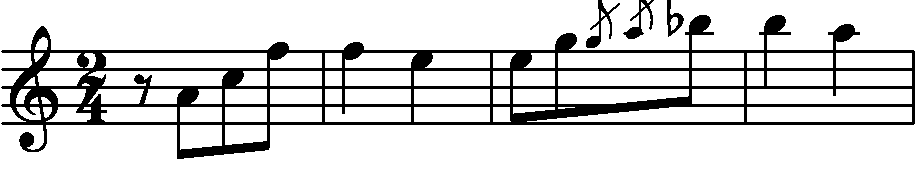

In [6]:
img.show()

In [9]:
blocks = []
img_arr = np.array(img, dtype=np.uint8)
for i in range(0, img_arr.shape[1] - 15, 15):
    for start in COLUMN_STARTPOINTS:
        block = img_arr[start:start + 15, i:i + 15]
        blocks.append(block)

In [11]:
for b in blocks:
    Image.fromarray(b * 255).show()

In [47]:
for file in tqdm(os.listdir(PNG_DIR)):
    blocks = []
    filepath = PNG_DIR / file
    img = Image.open(filepath)
    img_arr = np.array(img, dtype=np.uint8)
    for i in range(0, img_arr.shape[1] - 15, 15):
        for start in COLUMN_STARTPOINTS:
            block = img_arr[start:start + 15, i:i + 15]
            blocks.append(block_to_txt(block))
        blocks.append('<col>')
    with open(SAVEDIR / f"{file.split('.')[0]}.txt", "w") as f:
        f.write(' '.join(blocks))

  9%|███▎                                | 8102/87578 [14:27<2:21:45,  9.34it/s]


KeyboardInterrupt: 